# Andy Awlasewicz - Final Project
# Understanding Movie Streaming Data

![WatchingMovie](https://media.giphy.com/media/11vsrRFqhjOcKI/giphy.gif "movie")


In [361]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from wordcloud import WordCloud

In [2]:
streamdata = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')

In [4]:
imdbmovies = pd.read_csv('IMDB movies.csv', parse_dates = ['date_published'])

In [500]:
mychecks = pd.read_csv('checked.csv')

In [6]:
top250 = pd.read_csv('imdbs+top+250.csv')

In [7]:
imdbratings = pd.read_csv('IMDB ratings.csv')

In [527]:
services = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

# How to look at ratings

## Dataset included IMDB rating and Rotten Tomato average rating. Given the low match rate to imdb dataset below, will use this IMDb column from this dataset. Will discard Rotten Tomatoes as there is a much lower match rate for the data included in this dataset

In [9]:
streamdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [528]:
streamdata.head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,UniqueID,PlatformCount,Quality
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Inception-2010,1,High
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,The Matrix-1999,1,High
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Avengers: Infinity War-2018,1,High
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Back to the Future-1985,1,High
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,"The Good, the Bad and the Ugly-1966",2,High


In [20]:
# dropping this column as I won't need it
streamdata.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
# Data seems to be blank here so dropping the column
streamdata.drop(columns=['Type'], inplace=True)

In [ ]:
streamdata['IMDb'].astype(str)

def qualityrate(rating):
    
    if rating >= 7.0:
        return 'High'
    elif rating <= 3.0:
        return 'Low'
    elif rating < 7 and rating > 3:
        return 'OK'
    else:
        return 'None'
streamdata['Quality'] = streamdata['IMDb'].apply(lambda row: qualityrate(row))
#streamdata['UniqueID'] = streamdata['Title','Year','Directors'].apply(lambda row: concatenate(row['Title'], row['Year'], row['Directors']), axis=1)

In [530]:
def platformct (netflix, hulu, prime, disney):
    return sum((int(netflix), int(hulu), int(prime)), int(disney))
streamdata['PlatformCount'] = streamdata[['Netflix','Hulu','Prime Video','Disney+']].apply(lambda row: platformct(row['Netflix'], row['Hulu'], row['Prime Video'], row['Disney+']), axis=1)

In [132]:
# Had originally just used a concatenate column but saw a good example of how to use apply that was similar so applied it here
# https://queirozf.com/entries/pandas-dataframes-apply-examples

#def concat (title, year, director):
#    return str(title) + '-' + str(year) + '-' + str(director)

#streamdata['UniqueID'] = streamdata['Title','Year','Directors'].apply(lambda row: concatenate(row['Title'], row['Year'], row['Directors']), axis=1)

def concat (title, year):
    return str(title) + '-' + str(year) 

streamdata['UniqueID'] = streamdata[['Title','Year']].apply(lambda row: concat(row['Title'], row['Year']), axis=1)

# streamdata['UniqueID'] = streamdata['Title'] + '-' + streamdata['Year'].astype(str) + '-' + streamdata['Directors']

In [681]:
# Creating a unique identifier from imdb dataset to match to streaming data set, in a better world, the streaming data set would have had imdb identifier
def concat (title, year):
    return str(title) + '-' + str(year) 

imdbmovies['UniqueID'] = imdbmovies[['title','year']].apply(lambda row: concat(row['title'], row['year']), axis=1)


In [133]:
streamdata.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,UniqueID,PlatformCount,Quality
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Inception-2010,1,1
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,The Matrix-1999,1,1
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Avengers: Infinity War-2018,1,1
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Back to the Future-1985,1,1
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,"The Good, the Bad and the Ugly-1966",2,1


In [529]:
imdbmovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85819 entries, 0 to 85854
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85819 non-null  object 
 1   title                  85819 non-null  object 
 2   original_title         85819 non-null  object 
 3   year                   85819 non-null  object 
 4   date_published         85819 non-null  object 
 5   genre                  85819 non-null  object 
 6   duration               85819 non-null  int64  
 7   country                85755 non-null  object 
 8   language               84986 non-null  object 
 9   director               85732 non-null  object 
 10  writer                 84249 non-null  object 
 11  production_company     81366 non-null  object 
 12  actors                 85750 non-null  object 
 13  description            83704 non-null  object 
 14  avg_vote               85819 non-null  float64
 15  vo

In [524]:
imdbmovies.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,UniqueID
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,Miss Jerry-1894
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,The Story of the Kelly Gang-1906
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,Den sorte drøm-1911


In [523]:
streamdata.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime,PlatformCount
count,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16152.000000,16744.000000
mean,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,93.413447,1.038043
std,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,28.219222,0.194404
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,82.000000,1.000000
50%,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,92.000000,1.000000
75%,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,104.000000,1.000000
max,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,1256.000000,3.000000


In [467]:
# Creating a drop list of imdbtitles that merged with streamdata but were incorrect, or duplicates caused by title - year match to a different movie
# https://stackoverflow.com/questions/12065885/filter-dataframe-rows-if-value-in-column-is-in-a-set-list-of-values

# DUPLICATES NEED TO DROP
# row 295, 306, 348, 508, 
# 514 & 515 don't match Fury, wrong title used?
# row 748, 974, 995, 1208, 1524
# 1600 & 1601 can't find right match, not sure this movie exists? delete one row and then take out the imdbmovie columns (make null?)
# 1619, 2369
# 4197, 4198, 4199 none of the matches are right. delete 2 take out the imdbmovie columns
# 4221, 4222 neither match is right, delete 1 row and take out imdbmovie columns
# 6028, 6029 neither match is right ....
# 6321, 6322 neither match...
# 6596, 6597 neither match...
# 6908, 8598, 10541
# 12062, 12063 neither match
# 12740, 12741 neither match
# 13659, 13660 neither match
# 14047, 14048 neither match
# 15055, 15056 neither match
droplist = ['tt8246392', 'tt5260026', 'tt6102104', 'tt3685586', 'tt4087850', 'tt4786222', 'tt6194530', 'tt1967669', 
            'tt3334390', 'tt0451082', 'tt6013186', 'tt1950264', 'tt3381068', 'tt3574352', 'tt5492502', 'tt5525360', 
            'tt9412268', 'tt4594050', 'tt7976502', 'tt0798780', 'tt6998596', 'tt3131050', 'tt5978822', 'tt8530978', 
            'tt9351598', 'tt7106968', 'tt8456680, tt5629964, tt4126394', 'tt5037912', 'tt7259986', 'tt2932532', 
            'tt2991296', 'tt6986606', 'tt4439120', 'tt3343136', 'tt0762115', 'tt7631786', 'tt1967560']

droprows = imdbmovies[imdbmovies['imdb_title_id'].isin(droplist)].index
imdbmovies.drop(droprows, axis=0, inplace=True)

In [682]:
# https://www.geeksforgeeks.org/how-to-do-a-vlookup-in-python-using-pandas/
mergedata = pd.merge(left=streamdata, right=imdbmovies,  on='UniqueID', how='left')

In [683]:
mergedata['UniqueID'].value_counts()

Personal Tailor-2013                                       1
Strike One-2014                                            1
Our City Dreams-2008                                       1
7 Años-2016                                                1
Bill Maher: The Decider-2007                               1
                                                          ..
The Great Smokey Roadblock-1978                            1
Ace Ventura: Pet Detective-1994                            1
Coco-2017                                                  1
Casino Tycoon II-1992                                      1
The Beatles: Eight Days a Week - The Touring Years-2016    1
Name: UniqueID, Length: 16744, dtype: int64

In [684]:
len(mergedata[mergedata['imdb_title_id'].notna()])

5110

# Finding:

## The streaming data and merging data was only about one third successful so limited data-set analysis. For future, is there a better key to use, is there a better way to identify the streaming titles in a way that will be able to connect to imdb

# - Any IMDB, or personal checked movies will not have much confidence or will only reflect to a sample size

In [656]:
# needs to be called imdb title id to match the imdbmovie dataset, need to parse the id out of the url
mychecks['imdb_title_id'] = mychecks['imdburl'].str.split('/').str[4]
mychecks['mycheckcounter'] = 1

In [657]:
#only need the imdb_title_id column, checked, counter
mergedata2 = pd.merge(mergedata, mychecks[['imdb_title_id', 'checked', 'mycheckcounter']], on='imdb_title_id',how='left')

In [658]:
top250['imdb_title_id'] = top250['imdburl'].str.split('/').str[4]
top250['top250counter'] = 1

In [659]:
mergedata3 = pd.merge(mergedata2,top250[['imdb_title_id', 'top250counter']], on='imdb_title_id', how='left')

In [660]:
netflixmask = mergedata3['Netflix'] == 1
disneymask = mergedata3['Disney+'] == 1
hulumask = mergedata3['Hulu'] == 1
primemask = mergedata3['Prime Video'] == 1

In [661]:
print(mergedata3[netflixmask]['IMDb'].mean())
print(mergedata3[disneymask]['IMDb'].mean())
print(mergedata3[hulumask]['IMDb'].mean())
print(mergedata3[primemask]['IMDb'].mean())

6.252963393375944
6.441385435168739
6.1381165919282505
5.770910312395029


# Finding: 

## Disney+ has highest avg rating for a movie, almost 0.2 higher than the other services, which makes sense given structure of this platform



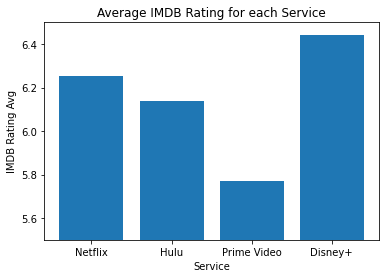

In [544]:
barmeans = [mergedata3[netflixmask]['IMDb'].mean(), mergedata3[hulumask]['IMDb'].mean(), mergedata3[primemask]['IMDb'].mean(), mergedata3[disneymask]['IMDb'].mean()]

plt.bar(services, barmeans)
plt.xlabel('Service')
plt.ylabel('IMDB Rating Avg')
plt.title('Average IMDB Rating for each Service')
plt.ylim(5.5,6.5)

plt.show()
# would ideally have shown data labels on the bar but this proved not easy to implement

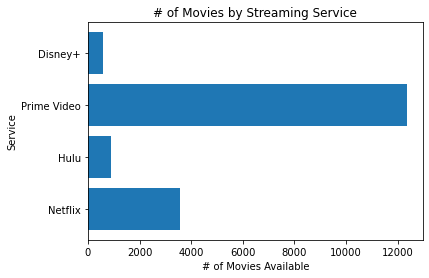

In [545]:
streamcount = [len(mergedata3[netflixmask]['ID']), len(mergedata3[hulumask]['ID']), len(mergedata3[primemask]['ID']), len(mergedata3[disneymask]['ID']) ]

plt.barh(services, streamcount)
plt.ylabel('Service')
plt.xlabel('# of Movies Available')
plt.title('# of Movies by Streaming Service')
plt.show()

# Finding: 

## While Prime Video has the lowest average rating (5.77) for their movies, their library is more than 3x any of the other streaming platforms

In [526]:
mergedata3.head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,UniqueID,PlatformCount,Quality
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Inception-2010,1,High
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,The Matrix-1999,1,High
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Avengers: Infinity War-2018,1,High
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Back to the Future-1985,1,High
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,"The Good, the Bad and the Ugly-1966",2,High


In [537]:
mergedata3.PlatformCount.value_counts()

1    16117
2      617
3       10
Name: PlatformCount, dtype: int64

In [538]:
# https://stackoverflow.com/questions/31866304/convert-a-column-in-pandas-to-one-long-string-python-3
# https://stackoverflow.com/questions/42316088/bokeh-attributeerror-dataframe-object-has-no-attribute-tolist
wordcloudtext = '-'.join(mergedata3[mergedata3['PlatformCount']>2]['Title'].tolist())

In [539]:
mergedata3[mergedata3['PlatformCount']>2][['Title','PlatformCount']]

,Title,PlatformCount
103,Amy,3
148,The Square,3
340,The Interview,3
497,Blame!,3
610,Evolution,3
1133,No Game No Life: Zero,3
1776,Zapped,3
2017,Mother,3
3960,The Kid,3
4313,Inside Out,3


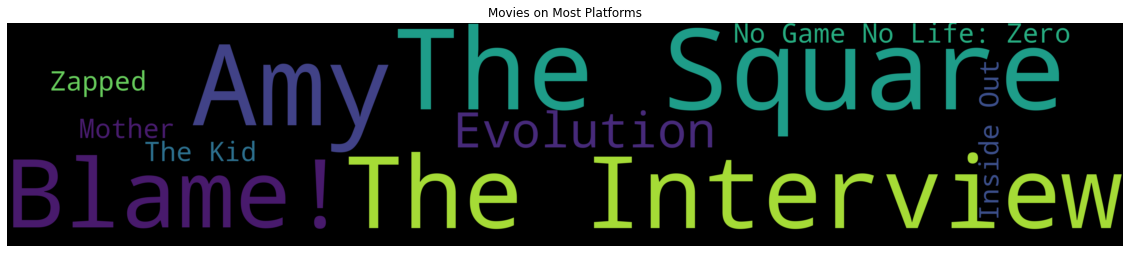

In [540]:
# Making a dictionary of the Titles where Platform Count is > 2 for the word cloud
# Using dictionary for phrases instead of word cloud only doing 1 word
# https://stackoverflow.com/questions/18012505/python-pandas-dataframe-columns-convert-to-dict-key-and-value
wordcloudtext = mergedata3[mergedata3['PlatformCount']>2][['Title', 'PlatformCount']]
word_dict = dict(zip(wordcloudtext.Title, wordcloudtext.PlatformCount))

# https://python-graph-gallery.com/260-basic-wordcloud/
# Needed a more complex word cloud that grouped multiple words together
# https://stackoverflow.com/questions/58286251/how-can-i-group-multi-word-terms-when-creating-a-python-wordcloud

wordcloud = WordCloud(width=5000, height=1000, margin=0).generate_from_frequencies(word_dict)

# Making word cloud bigger
# https://stackoverflow.com/questions/28786534/increase-resolution-with-word-cloud-and-remove-empty-border
plt.figure( figsize=(20,10) )

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Movies on Most Platforms")
plt.margins(x=0, y=0)
plt.show()

# Finding: Only 10 movies were streaming across 3 platforms (None at 4 platforms)

In [373]:
mergedata3['Quality'].value_counts()

OK      11834
High     3795
None      571
Low       544
Name: Quality, dtype: int64

In [377]:
highqual = mergedata3['Quality'] == 'High'
lowqual = mergedata3['Quality'] == 'Low'
qual = mergedata3['Quality'] != 'None'

In [378]:
mergedata3[qual]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,UniqueID,PlatformCount,Quality
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Inception-2010,1,High
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,The Matrix-1999,1,High
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Avengers: Infinity War-2018,1,High
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Back to the Future-1985,1,High
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,"The Good, the Bad and the Ugly-1966",2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,NaN,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0,Whispers: An Elephant's Tale-2000,1,OK
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,The Ghosts of Buxley Hall-1980,1,OK
16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,The Poof Point-2001,1,OK
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN,Sharks of Lost Island-2013,1,OK


In [ ]:
streamcount = [len(mergedata3[netflixmask]['ID']), len(mergedata3[hulumask]['ID']), len(mergedata3[primemask]['ID']), len(mergedata3[disneymask]['ID']) ]

In [379]:
mergedata3[netflixmask & qual]['Quality'].value_counts()

OK      2396
High    1011
Low       35
Name: Quality, dtype: int64

In [338]:
len(mergedata3[netflixmask].IMDb.notnull())

3560

In [337]:
mergedata3[mergedata3.IMDb.isnull()]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,UniqueID,PlatformCount,Quality
2137,2138,Making Unorthodox,2020,NaN,NaN,NaN,1,0,0,0,Marlene Melchior,"Short,Documentary",Germany,English,NaN,Making Unorthodox-2020,1,0
2355,2356,Little Singham aur Kaal ka Mahajaal,2018,NaN,NaN,NaN,1,0,0,0,NaN,NaN,NaN,NaN,NaN,Little Singham aur Kaal ka Mahajaal-2018,1,0
2479,2480,Night on Earth: Shot in the Dark,2020,NaN,NaN,NaN,1,0,0,0,Alex Minton,Documentary,NaN,NaN,59.0,Night on Earth: Shot in the Dark-2020,1,0
2552,2553,What the F* Is Going On?,2019,NaN,NaN,NaN,1,0,0,0,Bob Spiers,Comedy,NaN,NaN,NaN,What the F* Is Going On?-2019,1,0
2720,2721,Uncovered,2019,NaN,NaN,NaN,1,0,0,0,Jim McBride,Thriller,"United Kingdom,Spain,France",English,103.0,Uncovered-2019,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16208,16209,Cracking the Prophetic Code,2000,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,Cracking the Prophetic Code-2000,1,0
16209,16210,Behind the Race to the Moon,2002,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,51.0,Behind the Race to the Moon-2002,1,0
16210,16211,Late War Fighters of the Luftwaffe,1997,NaN,NaN,NaN,0,0,1,0,NaN,"Documentary,History,War",NaN,NaN,45.0,Late War Fighters of the Luftwaffe-1997,1,0
16211,16212,Beneath Alcatraz,1999,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,Beneath Alcatraz-1999,1,0


In [333]:
len(mergedata3[netflixmask]['IMDb'].notnull())

3560

In [380]:
mergedata3[hulumask & qual]['Quality'].value_counts()

OK      649
High    234
Low       9
Name: Quality, dtype: int64

In [381]:
mergedata3[primemask & qual]['Quality'].value_counts()

OK      8872
High    2529
Low      507
Name: Quality, dtype: int64

In [382]:
mergedata3[disneymask & qual]['Quality'].value_counts()

OK      378
High    181
Low       4
Name: Quality, dtype: int64

In [383]:
df1 = mergedata3[netflixmask].copy()
df2 = mergedata3[hulumask].copy()
df3 = mergedata3[primemask].copy()
df4 = mergedata3[disneymask].copy()

In [384]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
df1['Service'] = 'Netflix'
df2['Service'] = 'Hulu'
df3['Service'] = 'Prime'
df4['Service'] = 'Disney'

In [385]:
flattened = [df1, df2, df3, df4]
newflatdf = pd.concat(flattened)

In [386]:
newflatdf.shape

(17381, 19)

<AxesSubplot:xlabel='Service'>

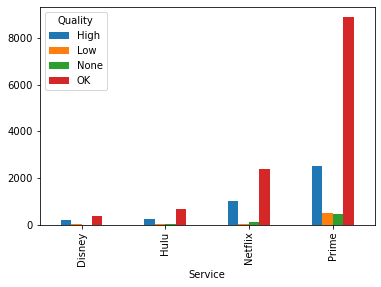

In [390]:
newflatdf.groupby(['Service'])['Quality'].value_counts().unstack().plot.bar()


In [546]:
highqual1 = newflatdf['Quality'] == 'High'
lowqual1 = newflatdf['Quality'] == 'Low'
qual1 = newflatdf['Quality'] != 'None'

In [550]:
newflatdf[highqual1 | lowqual1]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,UniqueID,PlatformCount,Quality,Service
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Inception-2010,1,High,Netflix
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,The Matrix-1999,1,High,Netflix
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Avengers: Infinity War-2018,1,High,Netflix
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Back to the Future-1985,1,High,Netflix
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,"The Good, the Bad and the Ugly-1966",2,High,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,16710,Prowlers of the Everglades,1953,NaN,8.0,NaN,0,0,0,1,James Algar,"Documentary,Short,Family",United States,English,32.0,Prowlers of the Everglades-1953,1,High,Disney
16714,16715,Drain The Ocean: WWII,2016,7+,7.0,NaN,0,0,0,1,Mike Slee,History,United States,English,44.0,Drain The Ocean: WWII-2016,1,High,Disney
16717,16718,Kingdom of the Blue Whale,2009,NaN,7.3,NaN,0,0,0,1,NaN,Documentary,United States,English,94.0,Kingdom of the Blue Whale-2009,1,High,Disney
16722,16723,Secrets of Life,1956,all,7.2,NaN,0,0,0,1,James Algar,"Documentary,Family",United States,English,70.0,Secrets of Life-1956,1,High,Disney


<AxesSubplot:xlabel='Service'>

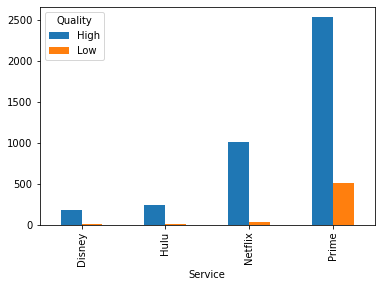

In [560]:
#wanted to get a slightly different chart that removed either no ratings, or just the movies deemed OK
newflatdf[highqual1 | lowqual1].groupby(['Service'])['Quality'].value_counts().unstack().plot.bar()

# Finding:

## As mentioned previously, Prime has the largest library of content, so their high quality content (>= 7.0) and lower quality content (<= 3.0) greatly outpace the other platforms

Text(0, 0.5, 'Movie Count')

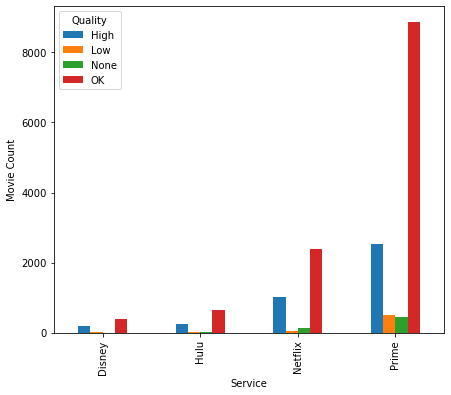

In [565]:
# This ended up being a different way of achieving same grouped bar chart above
thepivot = pd.pivot_table(newflatdf,
               values = "ID",
               index = "Service",
               columns = "Quality",
               aggfunc = 'count'
              )

ax = thepivot.plot(kind="bar")

fig = ax.get_figure()

fig.set_size_inches(7, 6)

ax.set_xlabel("Service")
ax.set_ylabel("Movie Count")

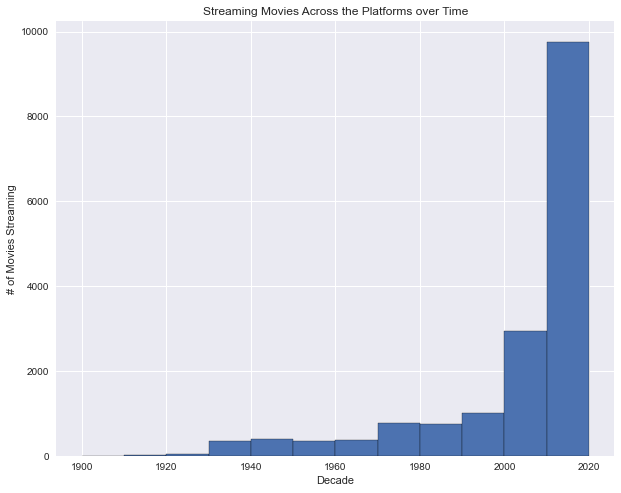

In [620]:
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

plt.style.use('seaborn')
plt.rc('figure', figsize = (10,8))

plt.hist(mergedata3.Year, bins=bins, edgecolor= 'black')
plt.title('Streaming Movies Across the Platforms over Time')
plt.xlabel('Decade')
plt.ylabel('# of Movies Streaming')
plt.show()

In [610]:
netflixmask1 = newflatdf['Service'] == 'Netflix'
hulumask1 = newflatdf['Service'] == 'Hulu'
primemask1 = newflatdf['Service'] == 'Prime'
disneymask1 = newflatdf['Service'] == 'Disney'

Text(0.5, 1.0, 'Disney+')

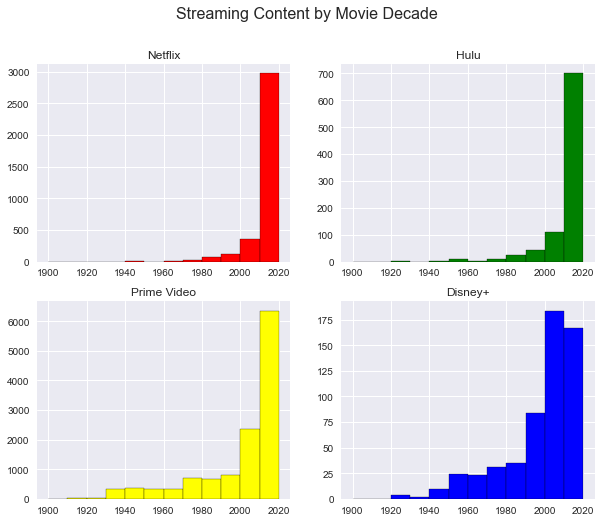

In [626]:
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(2, 2)
fig.suptitle("Streaming Content by Movie Decade", fontsize=16)
axs[0, 0].hist(newflatdf[netflixmask1].Year, bins=bins, edgecolor= 'black', color='red')
axs[0, 0].set_title('Netflix')
axs[0, 1].hist(newflatdf[hulumask1].Year, bins=bins, edgecolor = 'black', color='green')
axs[0, 1].set_title('Hulu')
axs[1, 0].hist(newflatdf[primemask1].Year, bins=bins, edgecolor = 'black', color = 'yellow')
axs[1, 0].set_title('Prime Video')
axs[1, 1].hist(newflatdf[disneymask1].Year, bins=bins, edgecolor = 'black', color = 'blue')
axs[1, 1].set_title('Disney+')

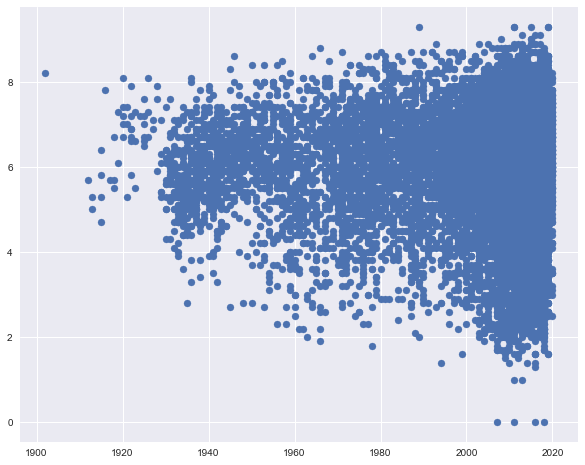

In [622]:
plt.scatter(mergedata3.Year, mergedata3.IMDb)
plt.title('Overall Streaming by Year and IMDb Rating')
plt.show()

In [509]:
sns.regplot(x='Acidity', y='altitude_mean_meters', color="tan", data=brazil2);

Text(0.5, 1.0, 'Disney+')

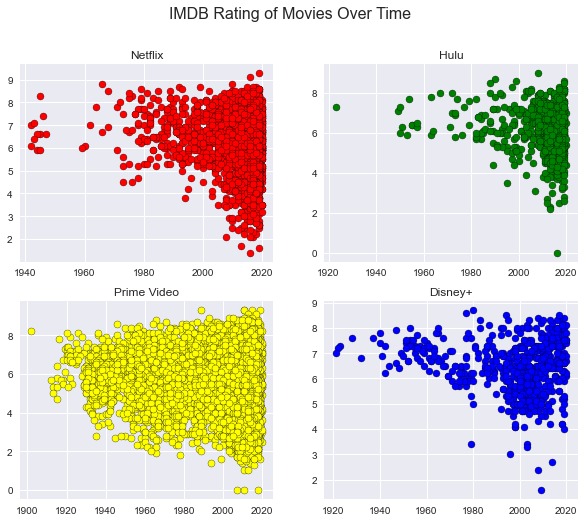

In [625]:
fig, axs = plt.subplots(2, 2)
fig.suptitle("IMDB Rating of Movies Over Time", fontsize=16)
axs[0, 0].scatter(newflatdf[netflixmask1].Year, newflatdf[netflixmask1].IMDb, edgecolor= 'black', color='red')
axs[0, 0].set_title('Netflix')
axs[0, 1].scatter(newflatdf[hulumask1].Year, newflatdf[hulumask1].IMDb, edgecolor = 'black', color='green')
axs[0, 1].set_title('Hulu')
axs[1, 0].scatter(newflatdf[primemask1].Year, newflatdf[primemask1].IMDb, edgecolor = 'black', color = 'yellow')
axs[1, 0].set_title('Prime Video')
axs[1, 1].scatter(newflatdf[disneymask1].Year, newflatdf[disneymask1].IMDb, edgecolor = 'black', color = 'blue')
axs[1, 1].set_title('Disney+')

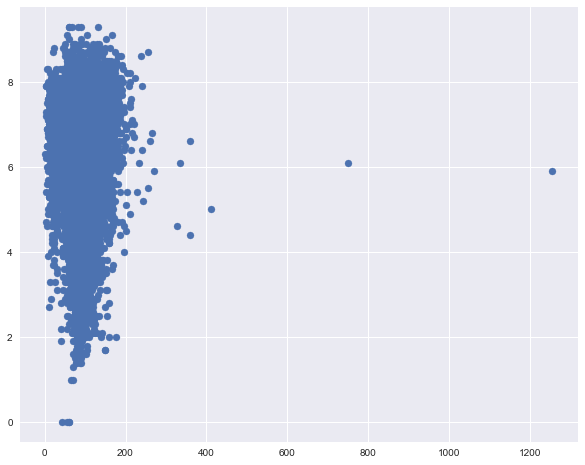

In [640]:
plt.scatter(mergedata3.Runtime, mergedata3.IMDb)

In [627]:
mergedata3.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'UniqueID', 'PlatformCount', 'Quality',
       'imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'checked',
       'mycheckcounter', 'top250counter'],
      dtype='object')

In [666]:
nocheck = mergedata3['mycheckcounter'].isnull() == True 
ididcheck = mergedata3['mycheckcounter'] == 1

In [667]:
mergedata3['mycheckcounter'].value_counts()

1.0    214
Name: mycheckcounter, dtype: int64

In [669]:
mergedata3[netflixmask & nocheck].sort_values(by = "IMDb", ascending=False).head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,checked,mycheckcounter,top250counter
1292,1293,My Next Guest with David Letterman and Shah Ru...,2019,NaN,9.3,NaN,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
947,948,Natsamrat,2016,NaN,9.1,NaN,1,0,0,0,...,4880.0,NaN,NaN,$ 633,NaN,56.0,8.0,NaN,NaN,NaN
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,1312,Eh Janam Tumhare Lekhe,2015,NaN,8.7,NaN,1,0,0,0,...,346.0,INR 40000000,NaN,$ 6393,NaN,9.0,NaN,NaN,NaN,NaN


In [674]:
imdbmovies[imdbmovies.title == 'Matrix']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,UniqueID
32229,tt0133093,Matrix,The Matrix,1999,1999-05-07,"Action, Sci-Fi",136,USA,English,"Lana Wachowski, Lilly Wachowski",...,A computer hacker learns from mysterious rebel...,8.7,1632315,$ 63000000,$ 171479930,$ 465718588,73.0,4310.0,342.0,Matrix-1999


In [688]:
mergedata3[hulumask & nocheck].sort_values(by = "IMDb").head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,checked,mycheckcounter,top250counter
4359,4360,9/11: 15 years later,2016,NaN,0.0,NaN,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,4409,Billy the Kid,2013,13+,2.2,NaN,0,1,0,0,...,323.0,$ 500000,NaN,NaN,NaN,19.0,1.0,NaN,NaN,NaN
4392,4393,Richard The Lionheart,2013,18+,2.3,NaN,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4429,4430,Night of the Living Dead: Resurrection,2012,18+,2.5,NaN,0,1,1,0,...,1341.0,NaN,NaN,$ 8393,NaN,41.0,18.0,NaN,NaN,NaN
4357,4358,Knights of the Damned,2017,NaN,2.5,NaN,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [687]:
mergedata3[hulumask & nocheck].sort_values(by = "IMDb", ascending=False).head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,checked,mycheckcounter,top250counter
3560,3561,The Dark Knight,2008,13+,9.0,94%,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3561,3562,GoodFellas,1990,18+,8.7,96%,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3564,3565,The Green Mile,1999,18+,8.6,78%,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3566,3567,Grave of the Fireflies,1988,7+,8.5,98%,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4283,4284,Brad Paisley Thinks He's Special,2019,NaN,8.5,NaN,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [686]:
mergedata3[primemask & nocheck].sort_values(by = "IMDb", ascending=False).head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,checked,mycheckcounter,top250counter
6566,6567,Square One,2019,NaN,9.3,NaN,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7220,7221,"Down, But Not Out!",2015,NaN,9.3,NaN,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5110,5111,Love on a Leash,2011,NaN,9.3,NaN,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7426,7427,Bounty,2011,NaN,9.3,NaN,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6837,6838,Steven Banks: Home Entertainment Center,1989,NaN,9.3,NaN,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [685]:
mergedata3[disneymask & nocheck].sort_values(by = "IMDb", ascending=False).head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,checked,mycheckcounter,top250counter
16213,16214,Star Wars: The Empire Strikes Back,1980,7+,8.7,94%,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16212,16213,Star Wars: A New Hope,1977,7+,8.6,92%,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16441,16442,Newsies: The Broadway Musical,2017,13+,8.5,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16582,16583,Phineas and Ferb: Mission Marvel,2013,all,8.3,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16215,16216,Toy Story,1995,all,8.3,100%,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [690]:
imdbmovies[imdbmovies['original_title'] == 'Toy Story']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,UniqueID
29371,tt0114709,Toy Story - Il mondo dei giocattoli,Toy Story,1995,1996-03-22,"Animation, Adventure, Comedy",81,USA,English,John Lasseter,...,A cowboy doll is profoundly threatened and jea...,8.3,864461,$ 30000000,$ 222498679,$ 404265438,95.0,617.0,160.0,Toy Story - Il mondo dei giocattoli-1995


In [692]:
mergedata3['Genres'].value_counts()

Drama                                              1341
Documentary                                        1229
Comedy                                             1040
Comedy,Drama                                        446
Horror                                              436
                                                   ... 
Animation,Drama,Family,Musical,Romance                1
Biography,Drama,Fantasy,History,Musical,Romance       1
Action,Crime,Fantasy,Music,Thriller                   1
Action,Drama,Music,Thriller                           1
Action,Fantasy,Horror,Mystery,Thriller                1
Name: Genres, Length: 1909, dtype: int64